In [31]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
resultados_eleicoes_df = pd.read_csv('data/raw_data/ResultadosEleicoesAutarquicas2013.csv')

In [33]:
# I only want the results referring to the "Câmara municipal" elections. 
resultados_cm_df = resultados_eleicoes_df.ix[resultados_eleicoes_df.Orgao == 'CM']
# Because of the last filtering the Freguesia column will always be null, so I can drop it. 
# Also dropping "dsc_municipio" column because it is redudant, always having the same value as the "Concelho" column
resultados_cm_df = resultados_cm_df.drop(['Freguesia', 'Orgao', 'dsc_municipio'], 1)

In [36]:
resultados_cm_df

,DICOFR,Ref_Municipio_INE,Concelho,Inscritos,Votantes,Brancos,Nulos,Sigla,Votos,Percentagem,M,Tipo,%Abstenção
48,140100,1401,ABRANTES,35075,18210,889.0,630,B.E.,1186.0,"7,11",0.0,Partido,48.082680
50,140100,1401,ABRANTES,35075,18210,889.0,630,CDS-PP,1090.0,"6,53",0.0,Partido,48.082680
52,140100,1401,ABRANTES,35075,18210,889.0,630,PPD/PSD,3393.0,"20,33",1.0,Partido,48.082680
54,140100,1401,ABRANTES,35075,18210,889.0,630,PS,8620.0,"51,64",5.0,Partido,48.082680
56,140100,1401,ABRANTES,35075,18210,889.0,630,PCP-PEV,2402.0,"14,39",1.0,Coligação,48.082680
87,10100,101,ÁGUEDA,43763,23373,1040.0,556,PS,13715.0,"62,98",5.0,Partido,46.591870
89,10100,101,ÁGUEDA,43763,23373,1040.0,556,PCP-PEV,918.0,"4,22",0.0,Coligação,46.591870
91,10100,101,ÁGUEDA,43763,23373,1040.0,556,PPD/PSD.CDS-PP,7144.0,"32,81",2.0,Coligação,46.591870
114,90100,901,AGUIAR DA BEIRA,6648,4375,71.0,89,PPD/PSD,1955.0,"46,38",2.0,Partido,34.190734
116,90100,901,AGUIAR DA BEIRA,6648,4375,71.0,89,PCP-PEV,33.0,"0,78",0.0,Coligação,34.190734


# Going to to some exploration of the data, to get used to pandas.

In [35]:
resultados_cm_df['%Abstenção'] = 100 - ((resultados_cm_df.Votantes / resultados_cm_df.Inscritos) * 100)

In [6]:
# Number of Concelhos: 308
number_of_concelhos = len(resultados_cm_df['Concelho'].unique())

## Analyse enrolled electors

In [98]:
eloctors_by_concelho = resultados_cm_df[['Concelho', 'Inscritos']].drop_duplicates()
assert len(eloctors_by_concelho) == 308

In [99]:
# Top 10 Conselhos with most people enrolled to vote
eloctors_by_concelho.sort_values(by='Inscritos', ascending=False)[0:10]

,Concelho,Inscritos
6579,LISBOA,508847
643,SINTRA,304080
3381,VILA NOVA DE GAIA,260984
1524,PORTO,219946
9786,CASCAIS,172537
6696,LOURES,166196
11521,BRAGA,159313
8481,MATOSINHOS,150242
5356,ALMADA,149539
3671,OEIRAS,147440


In [100]:
# Top 10 Conselhos with least people enrolled to vote. Wow, only 356 in Corvo.
eloctors_by_concelho.sort_values(by='Inscritos')[0:10]

,Concelho,Inscritos
10545,CORVO,356
6271,LAJES DAS FLORES,1302
11204,BARRANCOS,1437
2160,SANTA CRUZ DAS FLORES,1938
5529,ALVITO,2012
9294,MOURÃO,2389
10821,ARRONCHES,2755
9062,MONFORTE,2818
5155,ALCOUTIM,2833
7889,FRONTEIRA,2899


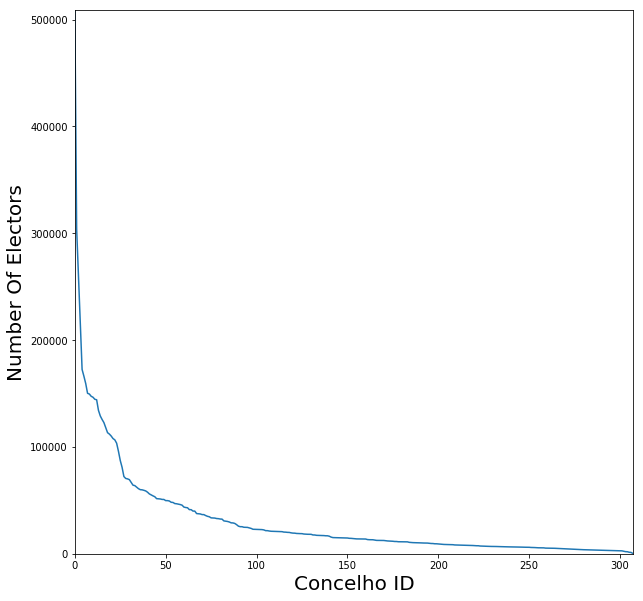

In [101]:
# What happens if I plot the number of electors by concelho, in desceding order?
eloctors_by_concelho_plot = elocters_by_concelho['Inscritos'].sort_values(ascending=False).plot(use_index=False, ylim=(0,508847), figsize=(10,10))
eloctors_by_concelho_plot.set_xlabel('Concelho ID', fontsize=20)
eloctors_by_concelho_plot.set_ylabel('Number Of Electors', fontsize=20)

### Cool, seems like the number of of electors by concelho follows a power law.

## Analyse voters

In [11]:
voters_by_concelho = resultados_cm_df[['Concelho', 'Inscritos', 'Votantes']].drop_duplicates()
assert len(voters_by_concelho) == 308

In [12]:
# Top 10 Concelhos with most %people voting
voters_by_concelho.sort_values(by='Votantes', ascending=False)[0:10]

,Concelho,Inscritos,Votantes
6579,LISBOA,508847,229154
3381,VILA NOVA DE GAIA,260984,139295
643,SINTRA,304080,123208
1524,PORTO,219946,115783
11521,BRAGA,159313,95414
6050,GUIMARÃES,144634,87548
6696,LOURES,166196,82256
3280,VILA NOVA DE FAMALICÃO,118128,76462
11191,BARCELOS,107898,74536
8481,MATOSINHOS,150242,73751
